<a href="https://colab.research.google.com/github/jh941213/NLP/blob/main/01_RNN_%E1%84%8C%E1%85%AE%E1%84%80%E1%85%A1%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

### FinanceDataReader Repo
- github : https://github.com/financedata-org/FinanceDataReader


- FinanceDataReader는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.


In [ ]:
# 라이브러리 설치하기
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

컬럼 설명
- Open: 시가
- High: 고가
- Low: 저가
- Close: 종가
- Volume: 거래량
- Change: 대비

In [ ]:
# 삼성전자 코드 넘버 - 005930
df_samsung = fdr.DataReader()
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-06-16,707,742,679,709,485540,NaN
1998-06-17,741,794,731,794,878674,0.119887
1998-06-18,837,889,828,889,1026804,0.119647
1998-06-19,888,893,811,847,1039669,-0.047244
1998-06-20,859,873,819,866,287300,0.022432
...,...,...,...,...,...,...
2022-08-19,61400,61600,60600,60900,6923679,-0.009756
2022-08-22,60300,60400,59800,60000,8259865,-0.014778
2022-08-23,59000,59600,59000,59100,9041629,-0.015000


In [ ]:
# Apple(AAPL), 2017-01-01 ~ Now
df_apple = fdr.DataReader()
df_apple

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092
...,...,...,...,...,...,...
2022-08-18,174.15,173.75,174.90,173.12,61590000.0,-0.0023
2022-08-19,171.52,173.03,173.74,171.31,70350000.0,-0.0151
2022-08-22,167.57,169.33,169.82,167.15,67540000.0,-0.0230


우리는 Tesla 데이터를 가지고 실습을 진행해봅시다. 

In [ ]:
# 테슬라 
df_tsla = fdr.DataReader()
df_tsla

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-30,1.59,1.72,2.03,1.55,257920000.0,0.0000
2010-07-01,1.46,1.67,1.73,1.35,123450000.0,-0.0818
2010-07-02,1.28,1.53,1.54,1.25,77130000.0,-0.1233
2010-07-06,1.07,1.33,1.33,1.06,103190000.0,-0.1641
2010-07-07,1.05,1.09,1.11,1.00,103870000.0,-0.0187
...,...,...,...,...,...,...
2022-08-18,302.87,306.00,306.50,301.85,47500000.0,-0.0037
2022-08-19,296.67,299.00,300.36,292.50,61400000.0,-0.0205
2022-08-22,289.91,291.91,292.40,286.30,55840000.0,-0.0228


In [ ]:
df_tsla.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-08-18,302.87,306.00,306.50,301.85,47500000.0,-0.0037
2022-08-19,296.67,299.00,300.36,292.50,61400000.0,-0.0205
2022-08-22,289.91,291.91,292.40,286.30,55840000.0,-0.0228
2022-08-23,296.45,291.45,298.83,287.92,63990000.0,0.0226
2022-08-24,297.10,297.56,303.65,296.50,57260000.0,0.0022


In [ ]:
# 데이터 프레임의 인덱스 출력하기

DatetimeIndex(['2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
               '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13', '2010-07-14',
               ...
               '2022-08-11', '2022-08-12', '2022-08-15', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24'],
              dtype='datetime64[ns]', name='Date', length=3061, freq=None)

### 데이터 시각화

Text(0, 0.5, 'price')

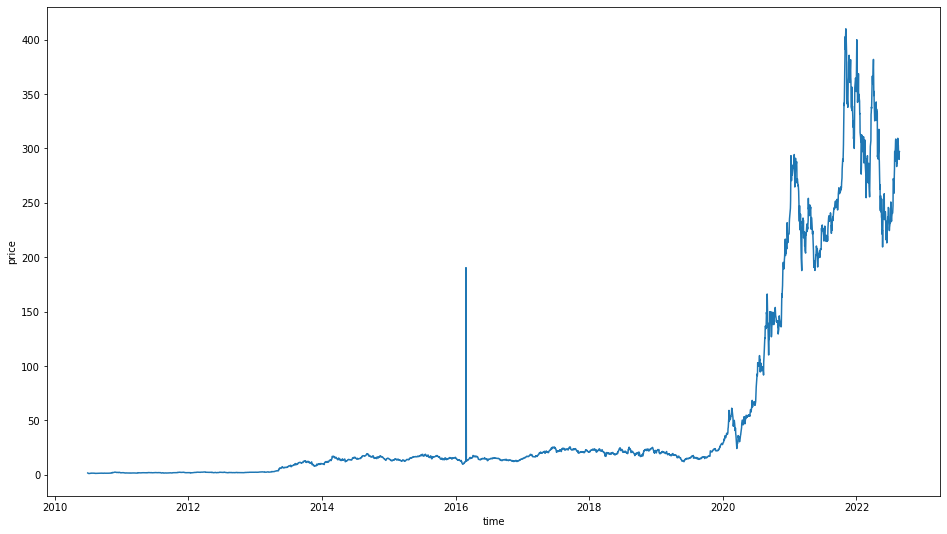

In [ ]:
# 아래와 같은 시각화를 해보세요

In [ ]:
# 같은 그림을 plotly로 그려보세요

### 데이터 전처리

In [ ]:
# 통계정보 확인해보세요

,Close,Open,High,Low,Volume,Change
count,3061.000000,3061.000000,3061.000000,3061.000000,3.061000e+03,3061.000000
mean,54.236557,54.250559,55.472502,52.930183,9.365285e+07,0.006616
std,92.476259,92.557823,94.713301,90.165919,8.260768e+07,0.256095
min,1.050000,1.080000,1.110000,1.000000,1.780000e+06,-0.932800
25%,8.070000,8.060000,8.220000,7.920000,4.094000e+07,-0.015100
50%,15.920000,15.900000,16.200000,15.630000,7.578000e+07,0.001000
75%,23.440000,23.500000,23.810000,23.070000,1.176700e+08,0.019500
max,409.970000,411.470000,414.500000,405.670000,9.140800e+08,14.000000


- 최소값이 0 인 column 체크 -> 없음


In [ ]:
# Missing Data 확인해보세요

Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [ ]:
# 아래와 같이 요약정보를 확인해보세요


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3061 entries, 2010-06-30 to 2022-08-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3061 non-null   float64
 1   Open    3061 non-null   float64
 2   High    3061 non-null   float64
 3   Low     3061 non-null   float64
 4   Volume  3061 non-null   float64
 5   Change  3061 non-null   float64
dtypes: float64(6)
memory usage: 167.4 KB


#### 데이터셋 만들기

여러 데이터 중에 우리는 "종가(Close)"를 중심으로 분석해봅시다.   
즉, 과거(n일)간의 종가를 바탕으로 미래의 종가를 예측하는 것입니다.   


- 이를 위해서는 어떤 데이터가 필요할까요? 

종가 데이터 만을 분리합니다

In [ ]:
# Close 열만 분리하여 넘파이 array로 만드세요

(3061, 1)


데이터를 정규화하겠습니다. 

In [ ]:
# MinMaxScaler를 사용하여 정규화하세요

#### windowed data 만들기

In [ ]:
def load_time_series_data(data, window_length):
    """함수를 만들어 보세요""" 

    return x_data, y_data

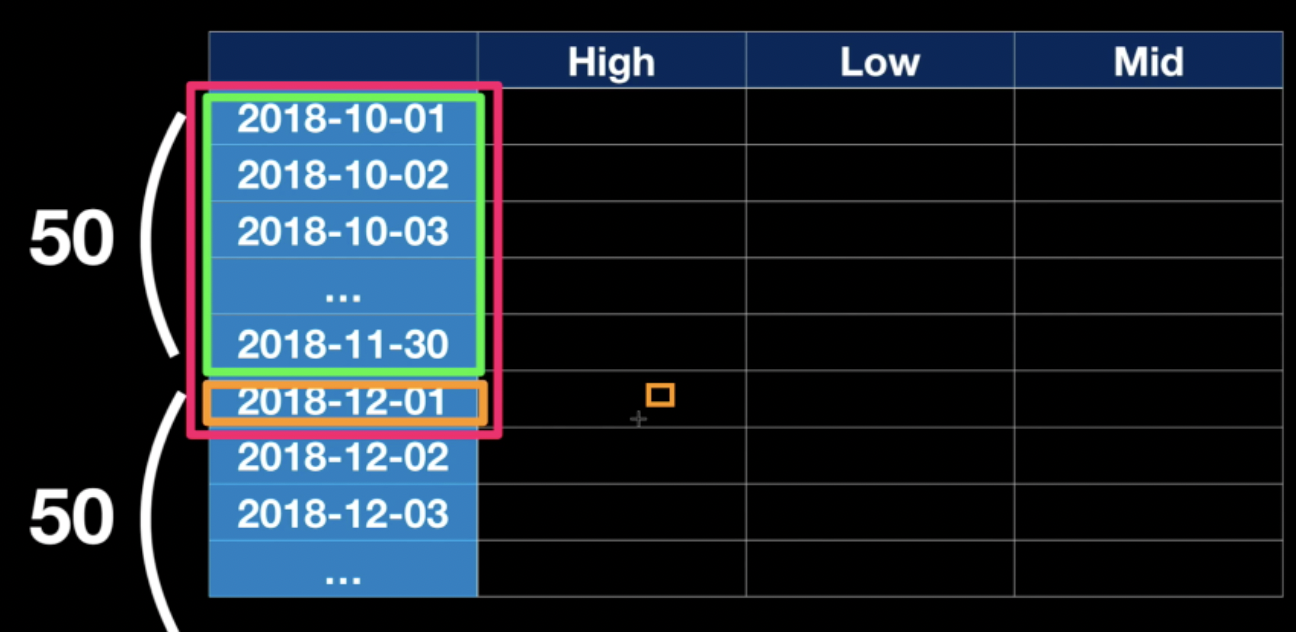

- 이미지 출처 : https://woochan-autobiography.tistory.com/871

In [ ]:
# 위에 만든 함수를 사용하여 window dataset을 만드세요

temp_data = np.arange(100).reshape(-1, 1)
window_size = 10

temp_x, temp_y = load_time_series_data(temp_data, 10)
print(temp_x[0])
print(temp_y[0])

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[10]


In [ ]:
# 위의 load_time_series_data 함수를 이용하여 windowed data 만들기 

# window 크기
window_length = 

x_data, y_data = load_time_series_data()

print(x_data.shape) 
print(y_data.shape) 

In [ ]:
# 학습데이터와 테스트 데이터 분리하기
# 예측결과 확인을 위해 shuffle=False를 사용
from sklearn.model_selection import train_test_split


print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape)
print(y_test.shape) 

### 모델링

In [ ]:
# 자유롭게 모델링해보세요

In [ ]:
model.summary()

In [ ]:
# 모델을 컴파일하게요 
# 단 loss = "mean_squared_error"
model.compile()

In [ ]:
# 모델을 학습시키세요

Epoch 1/50
67/67 [==============================] - 4s 15ms/step - loss: 1.8380e-04 - val_loss: 0.0017
Epoch 2/50
67/67 [==============================] - 0s 7ms/step - loss: 1.4548e-04 - val_loss: 6.1236e-04
Epoch 3/50
67/67 [==============================] - 1s 10ms/step - loss: 1.5788e-04 - val_loss: 0.0043
Epoch 4/50
67/67 [==============================] - 1s 9ms/step - loss: 1.4964e-04 - val_loss: 0.0018
Epoch 5/50
67/67 [==============================] - 0s 7ms/step - loss: 1.4420e-04 - val_loss: 0.0230
Epoch 6/50
67/67 [==============================] - 1s 10ms/step - loss: 1.3972e-04 - val_loss: 0.0055
Epoch 7/50
67/67 [==============================] - 0s 7ms/step - loss: 1.3430e-04 - val_loss: 0.0138
Epoch 8/50
67/67 [==============================] - 0s 7ms/step - loss: 1.3439e-04 - val_loss: 0.0299
Epoch 9/50
67/67 [==============================] - 1s 8ms/step - loss: 1.3289e-04 - val_loss: 0.0164
Epoch 10/50
67/67 [==============================] - 1s 7ms/step - loss: 1.

In [ ]:
def plot(data, y_predict_train, y_predict_test):
    plt.plot(scaler.inverse_transform(data)[:, [-1]].flatten(), label='Actual Close')

    y_predict_train = scaler.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[window_length:len(y_predict_train) + window_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='Train Data Predict Close')

    y_predict_test = scaler.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + window_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='Test Data Predict Close')

    plt.legend()
    plt.show()

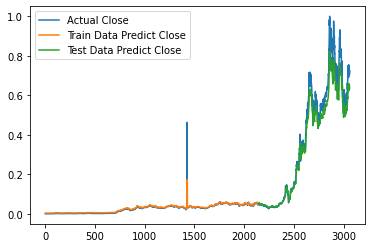

In [ ]:
# 모델을 시각화하세요 

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

### 출처

- https://teddylee777.github.io/tensorflow/lstm-stock-forecast 
- https://wikidocs.net/105909